# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

## 0.imports

In [8]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections

### 0.1 old info imports, just for checking purposes

In [2]:
# master folder for this dataset:
master_folder = r'Z:/20180911-IMR90_whole-chr21'
# get Folders, Field-of-views
folders, fovs = ia.get_img_info.get_folders(master_folder, feature='H', verbose=True)
# analysis
analysis_folder=master_folder+os.sep+'Analysis'

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65


## 1. Create Cell_Data item

In [93]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)

<module 'ImageAnalysis3.classes' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes.py'>

### 1.0 create cell_data class and load basic info

In [102]:
# specify initialization parameters:
param = {'data_folder':'Z:/20180911-IMR90_whole-chr21',
         'fov_id': 1,
         'cell_id': 1,
         'temp_folder': r'I:\Pu_temp',
         };
# initialize cell_data class:
a = ia.classes.Cell_Data(param)

# load color_usage
a._load_color_info();
# load encoding_scheme
a._load_encoding_scheme();

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Encoding_Scheme.csv
-- hyb per group: 5
-- region per group: 10
-- colors: ['750', '647', '561']
-- number of groups: [22, 22, 22]


### 1.1 Load more info for cell

In [ ]:
# load existing cell_info, dont run for the first time
a._load_from_file('cell_info')
# load segmentation
a._load_segmentation(_denoise_window=0);
# load drift info
drift = a._load_drift(_size=650, _dynamic=True)


### 1.2 Load images from raw data

In [ ]:
# load beads images
#bead_ims, bead_names = a._load_images('beads', _chromatic_correction=False, _load_in_ram=True)

# load raw un-cropped images
#splitted_ims = a._load_images('raw') 

# load cropped unique images:
#unique_ims, unique_ids, unique_channels = a._load_images('unique', _verbose=True, _save=True)

# load cropped combo images:
#combo_groups = a._load_images('combo')

### 1.3 Save to file 

In [ ]:
a._save_to_file('all') # save all

a._save_to_file('cell_info') # save all cell_info exclude images
a._save_to_file('cell_info', _save_dic={'distance_zxy':a.distance_zxy}) # save specifically this variable

a._save_to_file('unique') # save unique info into unique_rounds.npz

a._save_to_file('combo') # save combo_groups into Harry's format

### 1.4 Load from files

In [45]:
a._load_from_file('unique', _overwrite=False)
# similar examples for combo and all

- Loading unique from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\unique_rounds.npz
loading image with unique_id: 278
loading image with unique_id: 279
loading image with unique_id: 280
loading image with unique_id: 281
loading image with unique_id: 282
loading image with unique_id: 283
loading image with unique_id: 284
loading image with unique_id: 285
loading image with unique_id: 286
loading image with unique_id: 287
loading image with unique_id: 288
loading image with unique_id: 289
loading image with unique_id: 290
loading image with unique_id: 291
loading image with unique_id: 292
loading image with unique_id: 293
loading image with unique_id: 294
loading image with unique_id: 295
loading image with unique_id: 296
loading image with unique_id: 297
loading image with unique_id: 298
loading image with unique_id: 299
loading image with unique_id: 300
loading image with unique_id: 301
loading image with unique_id: 302
loading image with unique_id: 303
loading image

## 2. Generate and Pick chromosome

### 2.1 generate and identify chromosome

In [ ]:
# generate
a._generate_chromosome_image('combo')
# identify
a._identify_chromosomes();
# manually pick for only this cell
a._pick_chromosome_manual()

# then do manual picking and close the matplotlib notebook inferface.

### 2.2 Update chromosome coordinate info

In [ ]:
a._update_chromosome_from_file();

## 3. Fitting and picking spots

### 3.1 multi-fitting

In [46]:
a._multi_fitting()

+ Start multi-fitting for unique images
++ fitting for fov:1, cell:1, region:278
-- Multi-Fitting:3 points
-- Multi-Fitting:3 points
++ fitting for fov:1, cell:1, region:279
-- Multi-Fitting:5 points
-- Multi-Fitting:5 points
++ fitting for fov:1, cell:1, region:280
-- Multi-Fitting:7 points
-- Multi-Fitting:6 points
++ fitting for fov:1, cell:1, region:281
-- Multi-Fitting:4 points
-- Multi-Fitting:3 points
++ fitting for fov:1, cell:1, region:282
-- Multi-Fitting:2 points
-- Multi-Fitting:2 points
++ fitting for fov:1, cell:1, region:283
-- Multi-Fitting:2 points
-- Multi-Fitting:3 points
++ fitting for fov:1, cell:1, region:284
-- Multi-Fitting:5 points
-- Multi-Fitting:4 points
++ fitting for fov:1, cell:1, region:285
-- Multi-Fitting:3 points
-- Multi-Fitting:2 points
++ fitting for fov:1, cell:1, region:286
-- Multi-Fitting:0 points
-- Multi-Fitting:0 points
++ fitting for fov:1, cell:1, region:287
-- Multi-Fitting:3 points
-- Multi-Fitting:3 points
++ fitting for fov:1, cell:1, 

### 3.2 picking spots by intensity

In [97]:
a._naive_picking_spots()

+ Pick unique spots for by brightness in fov:1, cell:1
[2 1 0]
[2 1 0]
[3 2 1 0]
[3 2 1 0]
[6 5 4 3 2 1 0]
[5 4 3 2 1 0]
[2 1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[2 1 0]
[4 3 2 1 0]
[3 2 1 0]
[1 0]
[0]
[2 1 0]
[2 1 0]
[5 4 3 2 1 0]
[6 5 4 3 2 1 0]
[4 3 2 1 0]
[5 4 3 2 1 0]
[2 1 0]
[3 2 1 0]
[2 1 0]
[3 2 1 0]
[4 3 2 1 0]
[2 1 0]
[0]
[3 2 1 0]
[1 0]
[1 0]
[4 3 2 1 0]
[4 3 2 1 0]
[2 1 0]
[3 2 1 0]
[2 1 0]
[3 2 1 0]
[1 0]
[1 0]
[3 2 1 0]
[5 4 3 2 1 0]
[4 3 2 1 0]
[4 3 2 1 0]
[1 0]
[2 1 0]
[2 1 0]
[1 0]
[2 1 0]
[1 0]
[4 3 2 1 0]
[7 6 5 4 3 2 1 0]
[1 0]
[4 3 2 1 0]
[0]
[2 1 0]
[2 1 0]
[2 1 0]
[1 0]
[1 0]
[1 0]
[2 1 0]
[0]
[0]
[1 0]
[2 1 0]
[6 5 4 3 2 1 0]
[4 3 2 1 0]
[3 2 1 0]
[5 4 3 2 1 0]
[3 2 1 0]
[0]
[2 1 0]
[2 1 0]
[4 3 2 1 0]
[5 4 3 2 1 0]
[1 0]
[2 1 0]
[1 0]
[3 2 1 0]
[2 1 0]
[4 3 2 1 0]
[1 0]
[0]
[1 0]
[2 1 0]
[2 1 0]
[2 1 0]
[0]
[0]
[0]
[0]
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-c

[[array([3.04466968e+03, 1.30000000e+01, 6.80000000e+01, 1.08000000e+02,
         2.01290884e+03, 1.35000000e+00, 1.90000000e+00, 1.90000000e+00]),
  array([3.04466968e+03, 1.30000000e+01, 6.80000000e+01, 1.08000000e+02,
         2.01290884e+03, 1.35000000e+00, 1.90000000e+00, 1.90000000e+00])],
 [array([904.98969081,  16.        ,  71.        ,  98.        ,
         459.4999998 ,   1.35      ,   1.9       ,   1.9       ]),
  array([904.99897933,  16.        ,  71.        ,  98.        ,
         459.49999996,   1.35      ,   1.9       ,   1.9       ])],
 [array([5.60763181e+03, 1.70000000e+01, 7.10000000e+01, 9.80000000e+01,
         4.73357234e+02, 1.35000000e+00, 1.90000000e+00, 1.90000000e+00]),
  array([5.74701967e+03, 1.70000000e+01, 7.10000000e+01, 9.80000000e+01,
         4.52076522e+02, 1.35000000e+00, 1.90000000e+00, 1.90000000e+00])],
 [array([2.89076101e+03, 1.60000000e+01, 5.50000000e+01, 1.06000000e+02,
         1.75901343e+03, 1.35000000e+00, 1.90000000e+00, 1.90000000e

### 3.3 un-finished: distance map for one chromosome

In [98]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{a.chrom_coords[chrom_id]}");
# extract coordinates
spots = [sp[chrom_id] for sp in a.picked_unique_spots]
coords_in_pxl = np.stack([s[1:4] for s in spots]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * a.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))

<IPython.core.display.Javascript object>


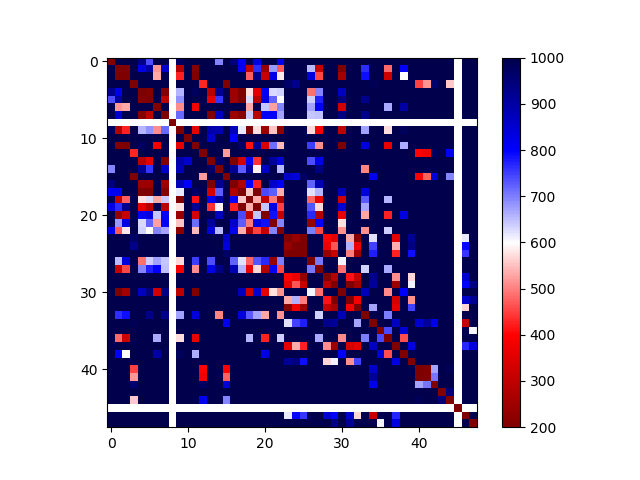

In [105]:
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=200, vmax=1000)
plt.colorbar()

### 3.4 dynamic picking spots